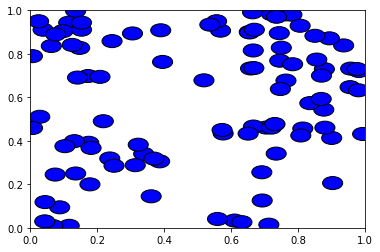

In [2]:
import numpy as np
import matplotlib.pyplot as plt

D_R = 0.01
D_T = 0.2*1e-6
v = 0.1
L = 1             # Dimensions of square box
a = 0.03          # radius of particle
N = 100
k = 150           # potential consntant

X = np.random.uniform(0,1,N)
Y = np.random.uniform(0,1,N)
Theta = np.random.uniform(0,2*np.pi,N)
X_i = X
Y_i = Y

msd_t = []

N_s = 1000
dt = 0.001
X = np.random.uniform(0,L,N)
Y = np.random.uniform(0,L,N)
Theta = np.random.uniform(0,2*np.pi,N)
X_i = X
Y_i = Y

for k in range(N_s):
    # search process
    F_x = np.zeros(N)
    F_y = np.zeros(N)
    for i in range(N):
        x_i = X[i]
        y_i = Y[i]
        cnt = 0
        for j in range(N):
            x_j = X[j]
            y_j = Y[j]
            if(np.abs(x_i - x_j)>= L/2):
                del_x = L - np.abs(x_i - x_j)
            else:
                del_x = np.abs(x_i - x_j)

            if(np.abs(y_i - y_j)>= L/2):
                del_y = L - np.abs(y_i - y_j)
            else:
                del_y = np.abs(y_i - y_j)

            del_r = np.sqrt(del_x**2 + del_y**2)
            if(del_r ==0):
                continue
            if(del_r <= 2*a):
                cnt += 1
                F_x[i] += -2*k*(del_r - 2*a)*del_x/del_r
                F_y[i] += -2*k*(del_r - 2*a)*del_y/del_r
    
    temp_th = Theta + np.sqrt(2*D_R)*np.sqrt(dt)*np.random.normal(0,1)
    X = X + v*np.cos(Theta)*dt + np.sqrt(2*D_T)*np.sqrt(dt)*np.random.normal(0,1) + F_x*dt
    Y = Y + v*np.sin(Theta)*dt + np.sqrt(2*D_T)*np.sqrt(dt)*np.random.normal(0,1) + F_y*dt
    Theta = temp_th
    for i in range(N):
        if(X[i]<0):
            X[i] = -X[i]
            X[i] = L - X[i]%L
        if(X[i]>L):
            X[i] = X[i]%L
        if(Y[i]<0):
            Y[i] = -Y[i]
            Y[i] = L - Y[i]%L
        if(Y[i]>L):
            Y[i] = Y[i]%L

fig, ax = plt.subplots()
circle = []
for i in range(N):
    circle.append(plt.Circle((X[i],Y[i]),a,facecolor='blue',edgecolor='black'))

for i in range(N):
    ax.add_patch(circle[i])


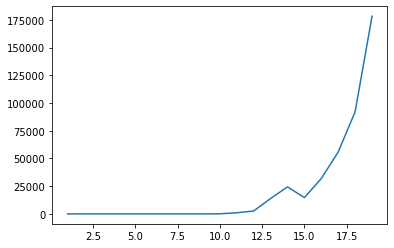

In [2]:
import numpy as np
import matplotlib.pyplot as plt


D_R = 0.01
D_T = 0.2*1e-6
v = 10*1e-6
L = 1             # Dimensions of square box
a = 0.05          # radius of particle
N = 50
k = 100           # potential consntant

X = np.random.uniform(0,1,N)
Y = np.random.uniform(0,1,N)
Theta = np.random.uniform(0,2*np.pi,N)
X_i = X
Y_i = Y

msd_t = []
tt = np.arange(1,20)
for t in tt:
    N_s = 1000
    dt = t/N_s
    X = np.random.uniform(0,1,N)
    Y = np.random.uniform(0,1,N)
    Theta = np.random.uniform(0,2*np.pi,N)
    X_i = X
    Y_i = Y
    
    for k in range(N_s):
        # search process
        F_x = np.zeros(N)
        F_y = np.zeros(N)
        for i in range(N):
            x_i = X[i]
            y_i = Y[i]
            cnt = 0
            for j in range(N):
                x_j = X[j]
                y_j = Y[j]
                if(np.abs(x_i - x_j)>= L/2):
                    del_x = L - np.abs(x_i - x_j)
                else:
                    del_x = np.abs(x_i - x_j)

                if(np.abs(y_i - y_j)>= L/2):
                    del_y = L - np.abs(y_i - y_j)
                else:
                    del_y = np.abs(y_i - y_j)

                del_r = np.sqrt(del_x**2 + del_y**2)
                if(del_r ==0):
                    continue
                if(del_r <= 2*a):
                    cnt += 1
                    F_x[i] += 2*k*(del_r - 2*a)*del_x/np.sqrt(del_x**2 + del_y**2)
                    F_y[i] += 2*k*(del_r - 2*a)*del_y/np.sqrt(del_x**2 + del_y**2)

        X = X + v*np.cos(Theta)*dt + np.sqrt(2*D_T)*np.sqrt(dt)*np.random.normal(0,1) + F_x*dt
        Y = Y + v*np.sin(Theta)*dt + np.sqrt(2*D_T)*np.sqrt(dt)*np.random.normal(0,1) + F_y*dt
        for i in range(N):
            if(X[i]<0):
                X[i] = L + X[i]
            if(X[i]>L):
                X[i] = X[i] - L
            if(Y[i]<0):
                Y[i] = L + Y[i]
            if(Y[i]>L):
                Y[i] = Y[i] - L
    msd_t.append(np.mean(np.power(X - X_i,2)+ np.power(Y - Y_i,2)))
    
plt.plot(tt,msd_t)

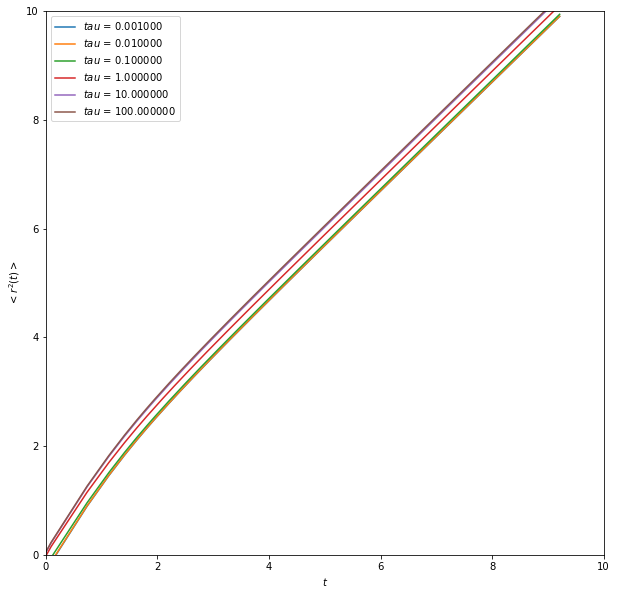

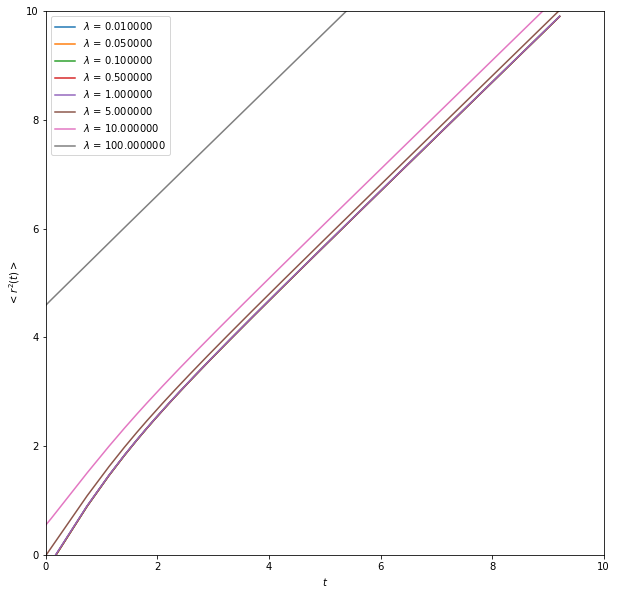

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def msd(t,v,D_R,p_f,tau):
    beta = D_R + 1/tau
    r_2 = 2*v*v*(D_R*t - 1 + np.exp(-D_R*t))/(D_R**2) + v*v*p_f*p_f*(beta*t - 1 + np.exp(-beta*t))/(beta*beta)
    return r_2

t = np.linspace(0.1,10000,10000)
TAU = np.array([0.001,0.01,0.1,1,10,100])


plt.rcParams["figure.figsize"] = (10,10)
plt.figure(1)
plt.xlabel('$t$')
plt.ylabel('$<r^2(t)>$')
plt.xlim(0,10)
plt.ylim(0,10)
for tau in TAU:
    y = msd(t,1,1,0.95,tau)
    plt.plot(np.log(t),np.log(y), label='$tau$ = %f'%tau)
    
plt.legend()


plt.figure(2)
plt.xlabel('$t$')
plt.ylabel('$<r^2(t)>$')
plt.xlim(0,10)
plt.ylim(0,10)
packing_fraction = np.array([0.01,0.05,0.1,0.5,1,5,10,100])

for pf in packing_fraction:
    y = msd(t,1,1,pf,0.01)
    plt.plot(np.log(t), np.log(y), label='$\lambda$ = %f'%pf)

plt.legend()
